In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib
import torch
import pickle as pkl
import os
import json

dirs = os.listdir("../results/wavegan")

print(dirs)

['20210305222154', '20210306101233', '20210306220931', '20210308122514', '20210308224438', '20210309222221', '20210404104725', '20210404105530', '20210406145945', '20210412170724', '20210413163259', '20210414204828', '20210414224813', '20210415181734', '20210416114818', '20210417115644', '20210420014055', '20210502161730', '20210505105743', '20210508092317', '20210515163910', '20210527091253', '20210527094440', '20210529193838', '20210601155250']


In [2]:
def open_hist(i):
    j = f"../results/wavegan/{dirs[i]}/config.json"
    with open(j, "r") as f:
        print(json.load(f))
    p = f"../results/wavegan/{dirs[i]}/history.pkl"
    with open(p, "rb") as f:
        return pkl.load(f)

def epoch_avg(hist, key, gen=False):
    if gen:
        return [np.mean([x['generator'][key] for x in epoch]) for epoch in hist]
    else:
        l = len(hist[0][0]['discriminator'])
        return [np.mean([x['discriminator'][l-1][key] for x in epoch]) for epoch in hist]
        
print(open_hist(0)[0][0]['discriminator'][4])

{'model_size': 16, 'shift_factor': 2, 'batch_shuffle': False, 'post_proc_filt_len': 512, 'alpha': 0.2, 'valid_ratio': 0.1, 'test_ratio': 0.1, 'batch_size': 64, 'num_epochs': 128, 'batches_per_epoch': 10, 'ngpus': 1, 'discriminator_updates': 5, 'latent_dim': 100, 'epochs_per_sample': 1, 'sample_size': 20, 'lmbda': 10.0, 'learning_rate': 1e-06, 'beta1': 0.5, 'beta2': 0.9, 'verbose': True, 'audio_dir': '/scratch-csedu/project/wdamen/thesis-experiments/sampleset/full', 'output_dir': '/scratch-csedu/project/wdamen/thesis-experiments/results/wavegan', 'model_dir': '/scratch-csedu/project/wdamen/thesis-experiments/results/wavegan/20210305222154'}
{'cost': array(4.4693403, dtype=float32), 'wasserstein_cost': array(-0.00947678, dtype=float32), 'cost_validation': array(4.5065393, dtype=float32), 'wasserstein_cost_validation': array(-0.01335347, dtype=float32)}


In [3]:
def plt_lossgraphs(hist):
    plt.plot(epoch_avg(hist, 'cost', True))
    plt.title('Generator Cost')
    plt.xlabel("Epoch number")
    plt.ylabel("$-D(G(z))$")
    plt.show()
    plt.plot(epoch_avg(hist, 'cost'), label='train loss')
    plt.plot(epoch_avg(hist, 'cost_validation'), label='val loss')
    plt.legend()
    plt.xlabel("Epoch number")
    plt.ylabel("WGAN-GP loss")
    plt.ylim([-.75,2])
    plt.title('Discriminator Cost')
    plt.show()
    plt.plot(epoch_avg(hist, 'wasserstein_cost'), label='train loss')
    plt.plot(epoch_avg(hist, 'wasserstein_cost_validation'), label='val loss')
    plt.legend()
    plt.xlabel("Epoch number")
    plt.ylabel("Wasserstein distance")
    plt.title('Discriminator W Cost')
    plt.show()

{'model_size': 48, 'shift_factor': 2, 'batch_shuffle': False, 'post_proc_filt_len': 512, 'alpha': 0.2, 'valid_ratio': 0.1, 'test_ratio': 0.01, 'batch_size': 32, 'num_epochs': 800, 'batches_per_epoch': 20, 'ngpus': 1, 'discriminator_updates': 5, 'latent_dim': 8, 'epochs_per_sample': 1, 'sample_size': 30, 'lmbda': 10.0, 'learning_rate': 0.0001, 'beta1': 0.5, 'beta2': 0.9, 'verbose': False, 'augment': False, 'fading': None, 'epochs_per_layer': None, 'audio_dir': '/ceph/csedu-scratch/project/wdamen/thesis-experiments/sampleset/full', 'output_dir': '/ceph/csedu-scratch/project/wdamen/thesis-experiments/results/wavegan', 'model_dir': '/ceph/csedu-scratch/project/wdamen/thesis-experiments/results/wavegan/20210527094440'}


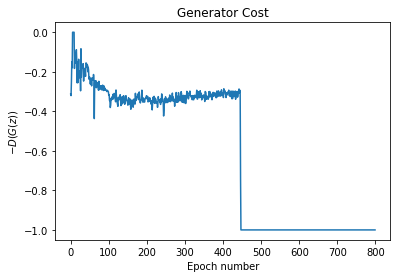

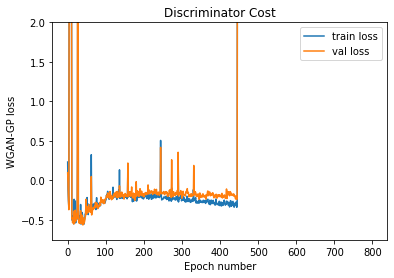

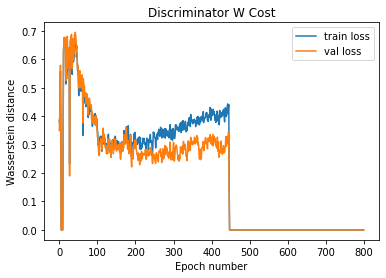

In [5]:
plt_lossgraphs(open_hist(-1))

In [7]:
def compare_gp(hist1, hist2):
    plt.plot(epoch_avg(hist1, 'cost', True), label="loss 1")
    plt.plot(epoch_avg(hist2, 'cost', True), label="loss 2")
    plt.title('Generator Cost')
    plt.xlabel("Epoch number")
    plt.ylabel("$-D(G(z))$")
    plt.show()
    plt.plot(epoch_avg(hist1, 'cost'), label='loss 1')
    plt.plot(epoch_avg(hist2, 'cost'), label='loss 2')
    plt.legend()
    plt.xlabel("Epoch number")
    plt.ylabel("WGAN-GP loss")
    plt.ylim([-.75,2])
    plt.title('Discriminator Cost')
    plt.show()
    plt.plot(epoch_avg(hist1, 'wasserstein_cost'), label='loss 1')
    plt.plot(epoch_avg(hist2, 'wasserstein_cost'), label='loss 2')
    plt.legend()
    plt.xlabel("Epoch number")
    plt.ylabel("Wasserstein distance")
    plt.title('Discriminator W Cost')
    plt.show()

{'model_size': 48, 'shift_factor': 2, 'batch_shuffle': False, 'post_proc_filt_len': 512, 'alpha': 0.2, 'valid_ratio': 0.1, 'test_ratio': 0.1, 'batch_size': 32, 'num_epochs': 1500, 'batches_per_epoch': 20, 'ngpus': 1, 'discriminator_updates': 5, 'latent_dim': 8, 'epochs_per_sample': 2, 'sample_size': 30, 'lmbda': 10.0, 'learning_rate': 0.0001, 'beta1': 0.5, 'beta2': 0.9, 'verbose': False, 'augment': True, 'fading': 'eta', 'epochs_per_layer': 250, 'audio_dir': '/ceph/csedu-scratch/project/wdamen/thesis-experiments/sampleset/full', 'output_dir': '/ceph/csedu-scratch/project/wdamen/thesis-experiments/results/wavegan', 'model_dir': '/ceph/csedu-scratch/project/wdamen/thesis-experiments/results/wavegan/20210515163910'}
{'model_size': 48, 'shift_factor': 2, 'batch_shuffle': False, 'post_proc_filt_len': 512, 'alpha': 0.2, 'valid_ratio': 0.1, 'test_ratio': 0.01, 'batch_size': 32, 'num_epochs': 800, 'batches_per_epoch': 20, 'ngpus': 1, 'discriminator_updates': 5, 'latent_dim': 8, 'epochs_per_sam

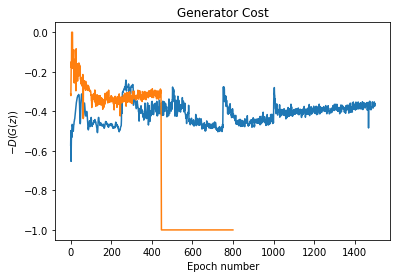

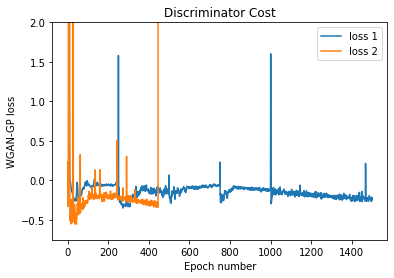

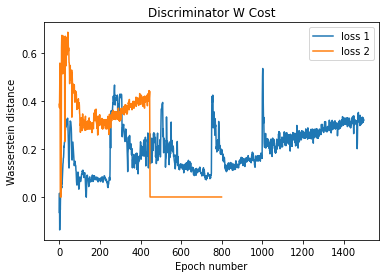

In [8]:
compare_gp(open_hist(-2), open_hist(-1))

In [8]:
import torchaudio
import librosa
import sys
sys.path.append("quality")
from qual import kick_qual

C:\Users\damen\anaconda3\lib\site-packages\torchaudio\extension\extension.py:14: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')
C:\Users\damen\anaconda3\lib\site-packages\torchaudio\backend\utils.py:63: UserWarning: The interface of "soundfile" backend is planned to change in 0.8.0 to match that of "sox_io" backend and the current interface will be removed in 0.9.0. To use the new interface, do `torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE = False` before setting the backend to "soundfile". Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(


In [9]:
def spec_eval(spec_file):
    spec_f = torchaudio.load(spec_path + '/' + spec_file)[0][0].numpy()
    spec_hop = 24576
    spec_n = 20
    avg = 0
    for i in range(spec_n):
        sample = spec_f[i*spec_hop:(i+1)*spec_hop]
        avg += kick_qual(sample)
    return avg/spec_n

# spec_quals = list(map(spec_eval,spec_files))
spec_quals = []

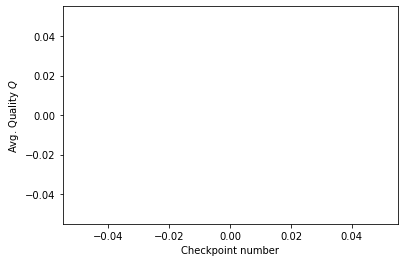

In [10]:
import tikzplotlib

plt.plot(spec_quals)
plt.xlabel('Checkpoint number')
plt.ylabel('Avg. Quality $Q$')
tikzplotlib.clean_figure()
tikzplotlib.save('specqual.tex', axis_width='3.2in', axis_height='2.4in')
plt.show()

In [11]:
spec_onsets = librosa.onset.onset_detect(y=spec_f, sr=32000, onset_envelope=None, hop_length=512, backtrack=True, energy=None, units='samples')

NameError: name 'spec_f' is not defined

In [ ]:
print(spec_onsets)

In [ ]:
with open("../results/pgan/mag-if_44k/mag-if_44k_losses.pkl", "rb") as f:
    magif = pkl.load(f)
print(len(magif))

In [ ]:
print(magif[1].keys())

In [ ]:
plt.plot(magif[4]['iter'], magif[4]['lossD'])
plt.show()

In [ ]:
def pgan_losses(key):
    losses = np.array([])
    for i in range(0,len(magif)):
        losses = np.concatenate((losses, magif[i][key]))
    plt.plot(losses)
    plt.title(key)
    plt.show()

In [ ]:
pgan_losses('Spread_R-F')
pgan_losses('lossD')

In [ ]:
    losses = np.array([])
    for i in range(0,len(magif)):
        losses = np.concatenate((losses, np.array(magif[i]['lossD_fake'])))
    plt.plot(losses)
    plt.title('lossD_fake + lossD_GP')
    plt.show()

In [1]:
import torch
import sys
sys.path.append("../experiments/wavegan")
from wavegan import load_wavegan_generator

G = load_wavegan_generator("../results/wavegan/20210601155250/model_gen.pkl", model_size=48, latent_dim=8)

C:\Users\damen\anaconda3\lib\site-packages\torchaudio\extension\extension.py:14: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')
C:\Users\damen\anaconda3\lib\site-packages\torchaudio\backend\utils.py:63: UserWarning: The interface of "soundfile" backend is planned to change in 0.8.0 to match that of "sox_io" backend and the current interface will be removed in 0.9.0. To use the new interface, do `torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE = False` before setting the backend to "soundfile". Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(
../experiments/wavegan\wavegan.py:168: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [2]:
import IPython

def display(sample):
    #do some pre and post padding to make the playback more smooth:
    out = np.empty(len(sample) + 4000)
    for i in range(0,2000):
        out[i] = 0.0
    for i in range(0,len(sample)):
        out[1000+i] = sample[i]
    for i in range(len(sample),len(sample)+2000):
        out[i] = 0.0
    return IPython.display.Audio(sample,rate=44100)

In [3]:
z = torch.Tensor([[0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]])
x = G(z)

torch.Size([1, 1536, 16])
torch.Size([1, 768, 64])
torch.Size([1, 384, 256])
torch.Size([1, 192, 1024])
torch.Size([1, 96, 4096])
torch.Size([1, 48, 16384])
torch.Size([1, 1, 32768])
torch.Size([1, 1, 32768])


In [4]:
print(x.shape)

torch.Size([1, 1, 32768])


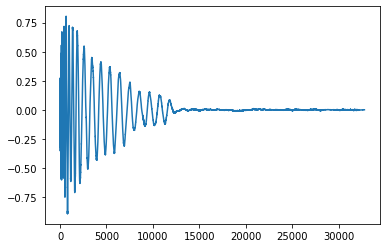

In [7]:
plt.plot(x[0][0].cpu().detach().numpy())
plt.show()

torch.Size([1, 1536, 16])
torch.Size([1, 768, 64])
torch.Size([1, 384, 256])
torch.Size([1, 192, 1024])
torch.Size([1, 96, 4096])
torch.Size([1, 48, 16384])
torch.Size([1, 1, 32768])
torch.Size([1, 1, 32768])


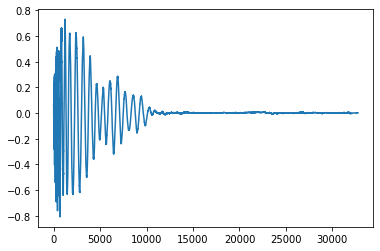

In [8]:
z = torch.Tensor(1, 8).uniform_(-1,1)
x = G(z)
plt.plot(x[0][0].cpu().detach().numpy())
plt.show()

display(x[0][0].cpu().detach().numpy())

In [9]:
xs = []
for p in np.arange(-1,1,0.1):
    z[0][0] = p
    xs.append(G(z).cpu().detach().numpy())


torch.Size([1, 1536, 16])
torch.Size([1, 768, 64])
torch.Size([1, 384, 256])
torch.Size([1, 192, 1024])
torch.Size([1, 96, 4096])
torch.Size([1, 48, 16384])
torch.Size([1, 1, 32768])
torch.Size([1, 1, 32768])
torch.Size([1, 1536, 16])
torch.Size([1, 768, 64])
torch.Size([1, 384, 256])
torch.Size([1, 192, 1024])
torch.Size([1, 96, 4096])
torch.Size([1, 48, 16384])
torch.Size([1, 1, 32768])
torch.Size([1, 1, 32768])
torch.Size([1, 1536, 16])
torch.Size([1, 768, 64])
torch.Size([1, 384, 256])
torch.Size([1, 192, 1024])
torch.Size([1, 96, 4096])
torch.Size([1, 48, 16384])
torch.Size([1, 1, 32768])
torch.Size([1, 1, 32768])
torch.Size([1, 1536, 16])
torch.Size([1, 768, 64])
torch.Size([1, 384, 256])
torch.Size([1, 192, 1024])
torch.Size([1, 96, 4096])
torch.Size([1, 48, 16384])
torch.Size([1, 1, 32768])
torch.Size([1, 1, 32768])
torch.Size([1, 1536, 16])
torch.Size([1, 768, 64])
torch.Size([1, 384, 256])
torch.Size([1, 192, 1024])
torch.Size([1, 96, 4096])
torch.Size([1, 48, 16384])
torch.S

In [10]:
y = []
for x in xs:
    for i in range(0,18000):
        y.append(x[0][0][i])

In [11]:
print(len(y))

360000


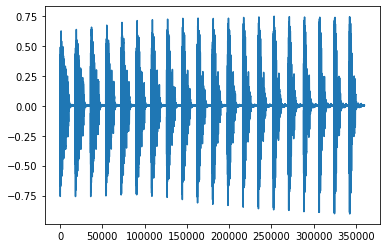

In [12]:
plt.plot(y)
plt.show()
display(y)

In [14]:
from soundfile import write
import scipy
import librosa

TypeError: create_target_machine() got an unexpected keyword argument 'jitdebug'

In [29]:
m3 = "../results/pgan/mag-if_44k/generation_tests/mag-if_44k_s4_i149994/random/202105121533"

for i, f in enumerate(os.listdir(m3)):
    p = m3 + '/' + f
    sample = torchaudio.load(p)[0][0].numpy()
    sample = librosa.util.normalize(sample)
    end_idx = len(sample)
    h = np.hanning(1025)
    for j in range(1, 512):
        sample[end_idx - j] *= h[1025 - j]
    write(f'm3/{i+1}.wav', sample, 44100)

In [18]:
for i in range(1,101):
    z = torch.Tensor(1, 8).uniform_(-1,1)
    x = G(z)
    sample = x[0][0].cpu().detach().numpy()
    write(f'samples/m5/{i}.wav', sample, 44100)

torch.Size([1, 1536, 16])
torch.Size([1, 768, 64])
torch.Size([1, 384, 256])
torch.Size([1, 192, 1024])
torch.Size([1, 96, 4096])
torch.Size([1, 48, 16384])
torch.Size([1, 1, 32768])
torch.Size([1, 1, 32768])
torch.Size([1, 1536, 16])
torch.Size([1, 768, 64])
torch.Size([1, 384, 256])
torch.Size([1, 192, 1024])
torch.Size([1, 96, 4096])
torch.Size([1, 48, 16384])
torch.Size([1, 1, 32768])
torch.Size([1, 1, 32768])
torch.Size([1, 1536, 16])
torch.Size([1, 768, 64])
torch.Size([1, 384, 256])
torch.Size([1, 192, 1024])
torch.Size([1, 96, 4096])
torch.Size([1, 48, 16384])
torch.Size([1, 1, 32768])
torch.Size([1, 1, 32768])
torch.Size([1, 1536, 16])
torch.Size([1, 768, 64])
torch.Size([1, 384, 256])
torch.Size([1, 192, 1024])
torch.Size([1, 96, 4096])
torch.Size([1, 48, 16384])
torch.Size([1, 1, 32768])
torch.Size([1, 1, 32768])
torch.Size([1, 1536, 16])
torch.Size([1, 768, 64])
torch.Size([1, 384, 256])
torch.Size([1, 192, 1024])
torch.Size([1, 96, 4096])
torch.Size([1, 48, 16384])
torch.S